<a href="https://colab.research.google.com/github/Caceres-A01706972/FruitsVegetables/blob/main/FruitsVegetables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificador Fruits and Vegetables**

### ***Objetivo:***

Desarrollar un clasificador de frutas y vegetales utilizando técnicas de aprendizaje automático.

Lo principal es clasificar imágenes estáticas de frutas y vegetales. Pero en futuras versiones se planea extender esta capacidad para clasificar en tiempo real utilizando la cámara, permitiendo llevar un registro de la cantidad de cada producto mostrado.

Esta funcionalidad está diseñada para facilitar el conteo y seguimiento de productos en un entorno de supermercado.

### ***Drive con el Dataset:***
[Dataset de Fruitas y Vegetales](https://drive.google.com/drive/folders/1Jkadebp3GhvkF-c1rBmxgevV6G_3diNX?usp=sharing)

### ***Nombre y Matricula:***

Ricardo Andrés Cáceres Villibord A01706972

## Conectando Google Drive y Configurango el directorio

In [7]:
from google.colab import drive
drive.mount('/content/drive')
# Aqui dse debe de sustituir el path en donde fue guardada la carpeta del Dataset
%cd "/content/drive/MyDrive/IA_8vo/Proyecto IA"
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/IA_8vo/Proyecto IA
Dataset  FruitsVegetables.ipynb


## Importando librerias necesarias

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image

## Directorios de Train y Test

In [9]:
base_dir = 'Dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

## Para sacar las rutas de las imagenes y sus categorias

In [10]:
image_paths = []
categories = []

# Recorrer todas las carpetas (categorías) y añadir las imagenes a la lista
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            if img_name.endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(category_path, img_name))
                categories.append(category)

# Ponerlo en un Dataframe para facil visualizacion
df = pd.DataFrame({
    'image_path': image_paths,
    'category': categories
})

df.head()

,image_path,category
0,Dataset/train/banana/Image_1.jpg,banana
1,Dataset/train/banana/Image_31.jpg,banana
2,Dataset/train/banana/Image_43.png,banana
3,Dataset/train/banana/Image_40.jpg,banana
4,Dataset/train/banana/Image_25.jpg,banana


## Visualización random de como son las imagenes

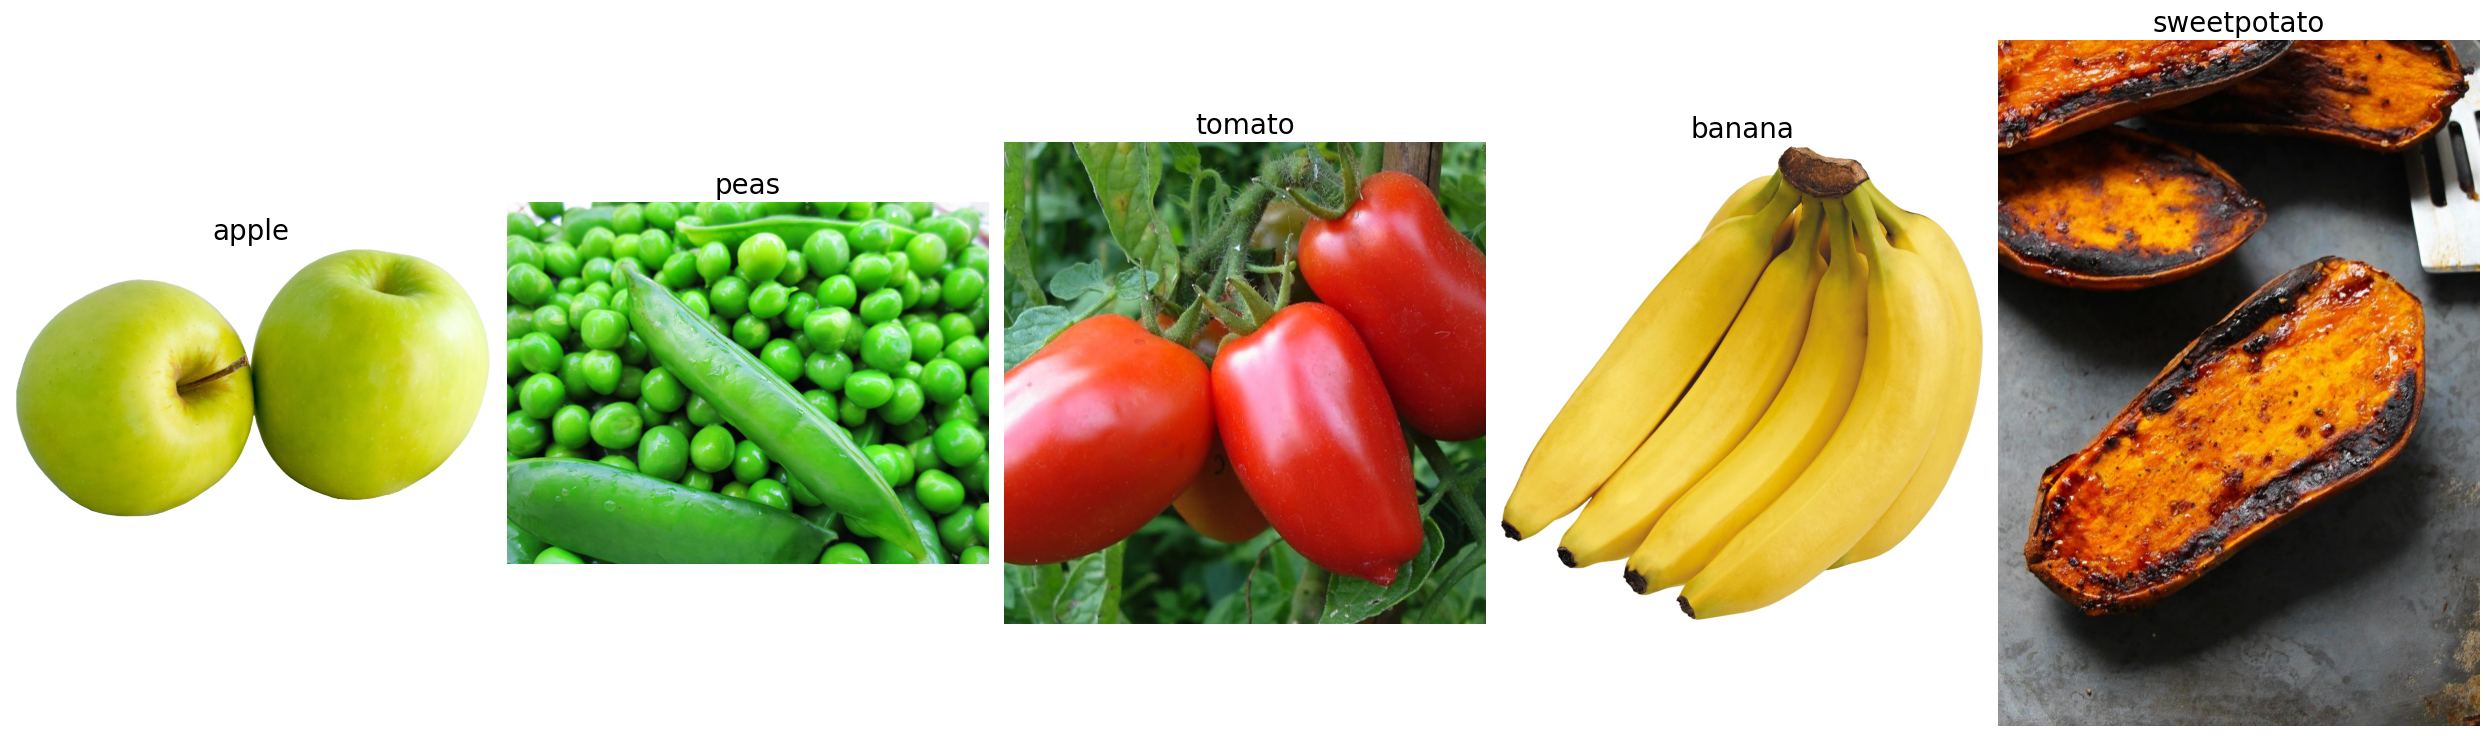

In [17]:
# Seleccionar 5 imágenes aleatorias
random_indices = random.sample(range(len(image_paths)), 5)
random_images = [image_paths[i] for i in random_indices]
random_categories = [categories[i] for i in random_indices]

# Mostrar 5 random images con su label
plt.figure(figsize=(25, 10))
for i in range(5):
    img = Image.open(random_images[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(random_categories[i], fontsize=20)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Data Augmentation
Esto geenera nuevas imagenes en el ram mientras se entrena. (En cada epoca se va a usar una version modificada de la imagen)

In [12]:
# Se define que transformaciones se le van a aplicar
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 100,
    zoom_range = 0.3,
    horizontal_flip = True
)

# Crear el generador de datos para el conjunto train
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 8,
    class_mode = 'categorical' # Hace one-hot encoding para las categorias (0,0,1,0,0,0.....)
)

Found 3115 images belonging to 36 classes.


Se normaliza las imagenes de test y se generan con el mismo tamaño y el one-hot encoding

In [13]:
# Generator que solo normaliza las imagenes de test
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Crear el generador de datos para el conjunto test
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 8,  # Tamaño del lote
    class_mode = 'categorical'
)

Found 359 images belonging to 36 classes.


## Visualización de Imagenes Aumentadas

In [14]:
augmented_images = [train_generator[0][0][1] for _ in range(5)]

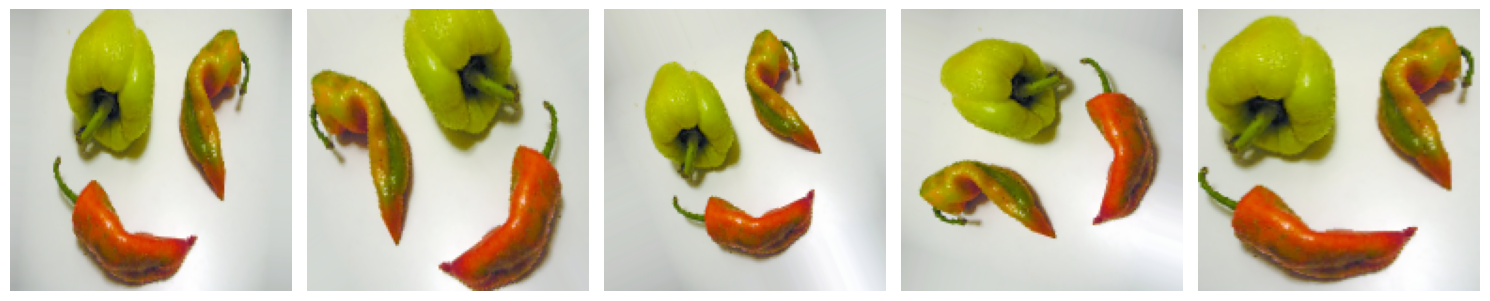

In [15]:
# Mostrar las imágenes aumentadas
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## Siguientes pasos



*   Generación del modelo de entrenamiento
*   Entrenamiento
*   Evaluación de modelo





